In [11]:
import os
import json
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

In [12]:
# Paths
dataset_root = "data/olive_diseases"
split = "train2017" # or val2017, test2017
ann_file = os.path.join(dataset_root, "annotations", f"instances_{split}.json")
img_dir = os.path.join(dataset_root, split)

# Load annotations
print(f"Loading annotations from {ann_file}...")
with open(ann_file, 'r') as f:
    coco_data = json.load(f)

print(f"Loaded {len(coco_data['images'])} images and {len(coco_data['annotations'])} annotations.")
print("Categories:", coco_data['categories'])

Loading annotations from data/olive_diseases/annotations/instances_train2017.json...
Loaded 956 images and 3388 annotations.
Categories: [{'id': 0, 'name': 'diseases-usdB', 'supercategory': 'none'}, {'id': 1, 'name': 'Anthracnose', 'supercategory': 'diseases-usdB'}, {'id': 2, 'name': 'BlackScale', 'supercategory': 'diseases-usdB'}, {'id': 3, 'name': 'OlivePeacockSpot', 'supercategory': 'diseases-usdB'}, {'id': 4, 'name': 'Psyllid', 'supercategory': 'diseases-usdB'}, {'id': 5, 'name': 'Tuberculosis', 'supercategory': 'diseases-usdB'}]


In [13]:
def get_img_info(img_id):
    for img in coco_data['images']:
        if img['id'] == img_id:
            return img
    return None

def get_anns(img_id):
    return [ann for ann in coco_data['annotations'] if ann['image_id'] == img_id]

def get_category_name(cat_id):
    for cat in coco_data['categories']:
        if cat['id'] == cat_id:
            return cat['name']
    return "Unknown"

In [14]:
def show_image_with_anns(img_id):
    img_info = get_img_info(img_id)
    if not img_info:
        print(f"Image {img_id} not found")
        return

    img_path = os.path.join(img_dir, img_info['file_name'])
    if not os.path.exists(img_path):
        print(f"Image file not found: {img_path}")
        return
        
    image = Image.open(img_path)
    anns = get_anns(img_id)

    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    ax = plt.gca()

    if not anns:
        print(f"No annotations for image {img_id}")

    for ann in anns:
        bbox = ann['bbox']
        cat_name = get_category_name(ann['category_id'])
        
        # COCO bbox is [x, y, width, height]
        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.text(bbox[0], bbox[1]-5, cat_name, color='white', fontsize=12, fontweight='bold', bbox=dict(facecolor='red', alpha=0.5))
        
        # Optional: Segmentation if available
        if 'segmentation' in ann and ann['segmentation']:
             for seg in ann['segmentation']:
                if isinstance(seg, list): # Polygon
                     poly = np.array(seg).reshape((-1, 2))
                     poly_patch = patches.Polygon(poly, linewidth=1, edgecolor='b', facecolor='b', alpha=0.2)
                     ax.add_patch(poly_patch)


    plt.axis('off')
    plt.show()

Visualizing Image ID: 926, File: 000000000651.jpg


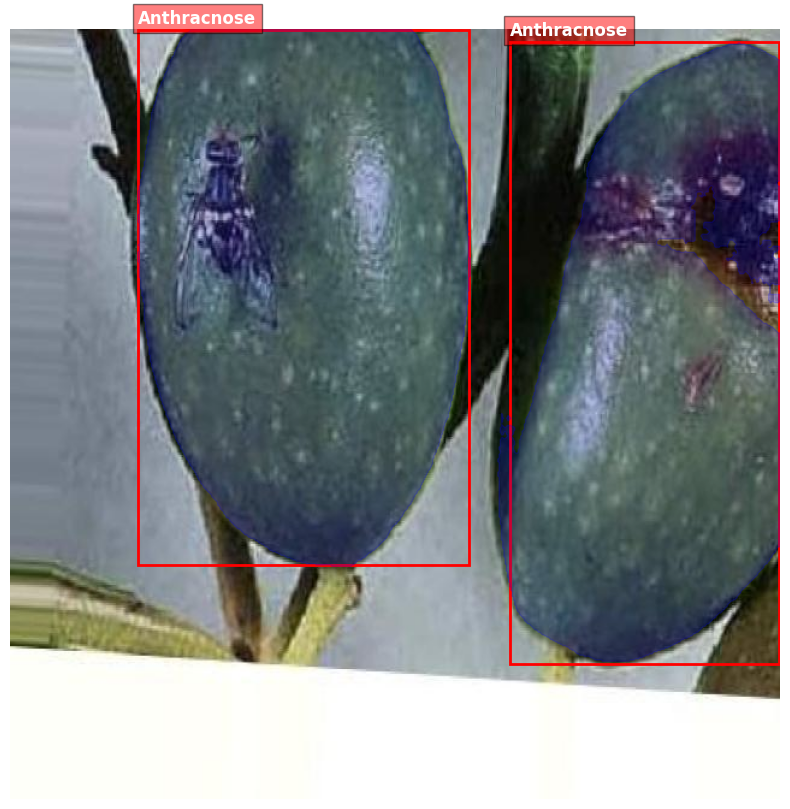

In [15]:
# Visualize random sample
if len(coco_data['images']) > 0:
    random_img = random.choice(coco_data['images'])
    print(f"Visualizing Image ID: {random_img['id']}, File: {random_img['file_name']}")
    show_image_with_anns(random_img['id'])
else:
    print("No images found in dataset.")